### Libraries Needed

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Importing the Data

In [4]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Data Cleaning

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#checking if our dataset has missing values
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Understanding the Data

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollars
11. PTRATIO - pupil/teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

In [7]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 506 rows and 14 columns


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


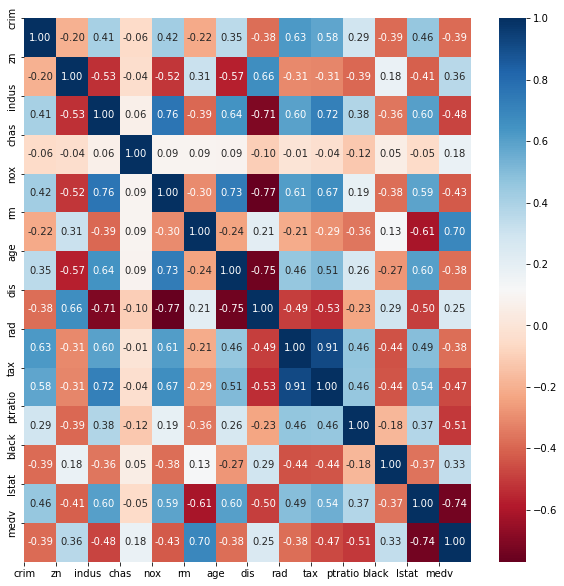

In [10]:
M = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(M, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(M.columns)), M.columns);
#Apply yticks
plt.yticks(range(len(M.columns)), M.columns)
#show plot
plt.show()

A) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.


The target variable is per capita crime rate in the town. The explainatory variables are:

In [14]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [15]:
#1.To predict per capita crime rate using ZN (ie) proportion of residential land zoned for lots over 25,000 sq.ft.

# dependent variable:
y = df.crim
#independent variable:
x = df.zn

x = sm.add_constant(x) # adding a constant

m1 = sm.OLS(y, x).fit()
predictions = m1.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~zn): \n")
print_model = m1.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~zn): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           5.51e-06
Time:                        19:19:39   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with proportion of residential land zoned for lots over 25,000 sq.ft.is given as:
$$crime(Y) = 4.4537 - 0.0739*zn(x)$$

* Here the $\beta_0$ value is 4.4537, which means the per capita crime in the town is 4.4537 when zn is zero. 
* The slope or $\beta_1$ is -0.0739, which means that as per rate capita crime increases by 1 unit the proportion of residential land zoned for lots over 25,000 sq.ft falls by 0.0739 units. 
* The $R^2$ value is 0.040(ie) 4% of information is explained by the independent variable zn the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between zn and the target variable(crim).

In [16]:
#2. To predict per capita crime rate using indus (ie) proportion of non-retail business acres per town.

# dependent variable:
y = df.crim
#independent variable:
x = df.indus

x = sm.add_constant(x) # adding a constant

m2 = sm.OLS(y, x).fit()
predictions = m2.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~indus): \n")
print_model = m2.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~indus): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.45e-21
Time:                        19:26:56   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with proportion of non-retail business acres per town is given as:
$$crime(Y) = -2.0637 + 0.5098*indus(x)$$

* Here the $\beta_0$ value is -2.0637, which means the per capita crime in the town falls by 2.0637 when indus is zero. 
* The slope or $\beta_1$ is 0.5098, which means that as per rate capita crime increases by 1 unit the proportion of non-retail business acres per town increases by 0.5098 units. 
* The $R^2$ value is 0.165(ie) 16.5% of information is explained by the independent variable indus the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between indus and the target variable(crim).

In [17]:
#3. To predict per capita crime rate using chas (ie) Charles River dummy variable

# dependent variable:
y = df.crim
#independent variable:
x = df.chas

x = sm.add_constant(x) # adding a constant

m3 = sm.OLS(y, x).fit()
predictions = m3.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~chas): \n")
print_model = m3.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~chas): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Fri, 29 Apr 2022   Prob (F-statistic):              0.209
Time:                        19:27:38   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with Charles River dummy variable (1 if tract bounds river; 0 otherwise) is given as:
$$crime(Y) = 3.7444 -1.8928*chas(x)$$

* Here the $\beta_0$ value is -2.0637, which means the per capita crime in the town increases by 2.0637 when chas is zero. 
* The slope or $\beta_1$ is -1.8928.  
* The $R^2$ value is 0.003(ie) 0.3% of information is explained by the independent variable chas the rest information is explained by other variables.
* The p-value is 0.209 > 0.05 So we can conclude that there is no statistically significant association between chas and the target variable(crim).

In [18]:
#4. To predict per capita crime rate using nox (ie) nitric oxides concentration (parts per 10 million)

# dependent variable:
y = df.crim
#independent variable:
x = df.nox

x = sm.add_constant(x) # adding a constant

m4 = sm.OLS(y, x).fit()
predictions = m4.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~nox): \n")
print_model = m4.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~nox): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           3.75e-23
Time:                        19:28:24   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with nitric oxides concentration is given as:
$$crime(Y) = -13.7199 + 31.2485*nox(x)$$

* Here the $\beta_0$ value is -13.7199, which means the per capita crime in the town falls by 13.7199 when nox is zero concentration. 
* The slope or $\beta_1$ is 31.2485, which means that as nos concentration increases by 1 unit the crime rate also increases by 31.2485 units.  
* The $R^2$ value is 0.177(ie) 17.7% of information is explained by the independent variable nox the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between nox and the target variable(crim).

In [19]:
#5. To predict per capita crime rate using rm (ie) average number of rooms per dwelling

# dependent variable:
y = df.crim
#independent variable:
x = df.rm

x = sm.add_constant(x) # adding a constant

m5 = sm.OLS(y, x).fit()
predictions = m5.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~rm): \n")
print_model = m5.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~rm): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           6.35e-07
Time:                        19:29:21   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with average number of rooms per dwelling is given as:
$$crime(Y) = 20.4818 -2.6841*rm(x)$$

* Here the $\beta_0$ value is 20.4818, which means the per capita crime in the town increases by 20.4818 when rm is zero. 
* The slope or $\beta_1$ is -2.6841, which means that as average number of rooms per dwelling becomes by 1 the crime rate  falls by 2.6841 units.  
* The $R^2$ value is 0.048(ie) 4.8% of information is explained by the independent variable rm the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between rm and the target variable(crim).

In [21]:
#6. To predict per capita crime rate using age (ie) proportion of owner-occupied units built prior to 1940

# dependent variable:
y = df.crim
#independent variable:
x = df.age

x = sm.add_constant(x) # adding a constant

m6 = sm.OLS(y, x).fit()
predictions = m6.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~age): \n")
print_model = m6.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~age): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.85e-16
Time:                        19:30:30   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with proportion of owner-occupied units built prior to 1940 is given as:
$$crime(Y) = -3.7779 + 0.1078*age(x)$$

* Here the $\beta_0$ value is -3.7779, which means the per capita crime in the town falls by 3.7779 when age is zero. 
* The slope or $\beta_1$ is 0.1078, which means that as proportion of owner-occupied units built prior to 1940 increases by 1 the crime rate  increases by 0.1078 units.  
* The $R^2$ value is 0.124(ie) 12.4% of information is explained by the independent variable age the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between age and the target variable(crim).

In [22]:
#7.To predict per capita crime rate using dist (ie) weighted distances to five Boston employment centres

# dependent variable:
y = df.crim
#independent variable:
x = df.dis

x = sm.add_constant(x) # adding a constant

m7 = sm.OLS(y, x).fit()
predictions = m7.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~dis): \n")
print_model = m7.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~dis): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           8.52e-19
Time:                        19:30:44   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with weighted distances to five Boston employment centres is given as:
$$crime(Y) = 9.4993 -1.5509*dis(x)$$

* Here the $\beta_0$ value is 9.4993, which means the per capita crime in the town increases by 9.4993 when dist is zero. 
* The slope or $\beta_1$ is -1.5509, which means that as weighted distances to five Boston employment centres increases by 1 unit the crime rate  falls by 1.5509 units.  
* The $R^2$ value is 0.144(ie) 14.4% of information is explained by the independent variable dist the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between dist and the target variable(crim).

In [23]:
#8. To predict per capita crime rate using rad (ie) index of accessibility to radial highways
# dependent variable:
y = df.crim
#independent variable:
x = df.rad

x = sm.add_constant(x) # adding a constant

m8 = sm.OLS(y, x).fit()
predictions = m8.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~rad): \n")
print_model = m8.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~rad): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.69e-56
Time:                        19:31:11   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with index of accessibility to radial highways is given as:
$$crime(Y) = -2.2872 + 0.6179*rad(x)$$

* Here the $\beta_0$ value is -2.2872, which means the per capita crime in the town falls by 2.2872 when rad is zero. 
* The slope or $\beta_1$ is 0.6179, which means that as accessibility to radial highways increases by 1 index the crime rate  increases by 0.6179 units.  
* The $R^2$ value is 0.391(ie) 39.1% of information is explained by the independent variable rad the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between rad and the target variable(crim).

In [24]:
#9.To predict per capita crime rate using tax (ie) full-value property-tax rate per $10,000 
# dependent variable:
y = df.crim
#independent variable:
x = df.tax

x = sm.add_constant(x) # adding a constant

m9 = sm.OLS(y, x).fit()
predictions = m9.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~tax): \n")
print_model = m9.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~tax): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.36e-47
Time:                        19:32:16   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with tax is given as:
$$crime(Y) = -8.5284 + 0.0297*tax(x)$$

* Here the $\beta_0$ value is -8.5284, which means the per capita crime in the town falls by 8.5284 when tax is zero. 
* The slope or $\beta_1$ is 0.0297, which means that as tax increases by 1 unit the crime rate  increases by 0.0297 units.  
* The $R^2$ value is 0.340(ie) 34% of information is explained by the independent variable tax the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between tax and the target variable(crim).

In [25]:
#10. To predict per capita crime rate using ptratio (ie) pupil-teacher ratio by town
# dependent variable:
y = df.crim
#independent variable:
x = df.ptratio

x = sm.add_constant(x) # adding a constant

m10 = sm.OLS(y, x).fit()
predictions = m10.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~ptratio): \n")
print_model = m10.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~ptratio): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.94e-11
Time:                        19:33:09   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with pupil-teacher ratio by town is given as:
$$crime(Y) = -17.6469 + 0.0297*tax(x)$$

* Here the $\beta_0$ value is -17.6469, which means the per capita crime in the town falls by 17.6469 when pupil-teacher ratio is zero. 
* The slope or $\beta_1$ is 1.1520, which means that as pupil-teacher ratio by town increases by 1 unit the crime rate  increases by 1.1520 units.  
* The $R^2$ value is 0.084(ie) 8.4% of information is explained by the independent variable pupil-teacher ratio the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between pupil-teacher ratio and the target variable(crim).

In [26]:
#11. To predict per capita crime rate using black (ie) 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# dependent variable:
y = df.crim
#independent variable:
x = df.black

x = sm.add_constant(x) # adding a constant

m11 = sm.OLS(y, x).fit()
predictions = m11.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~black): \n")
print_model = m11.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~black): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.49e-19
Time:                        19:33:49   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with proportion of blacks by town is given as:
$$crime(Y) = 16.5535 -0.0363*black(x)$$

* Here the $\beta_0$ value is 16.5535, which means the per capita crime in the town increases by 16.5535 when proportion of blacks by town is zero. 
* The slope or $\beta_1$ is -0.0363, which means that as proportion of blacks by town increases by 1 unit the crime rate  falls by 0.0363 units.  
* The $R^2$ value is 0.148(ie) 14.8% of information is explained by the independent variable proportion of blacks by town the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between proportion of blacks by town and the target variable(crim).

In [27]:
#12. To predict per capita crime rate using lstat (ie) % lower status of the population
# dependent variable:
y = df.crim
#independent variable:
x = df.lstat

x = sm.add_constant(x) # adding a constant

m12 = sm.OLS(y, x).fit()
predictions = m12.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~lstat): \n")
print_model = m12.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~lstat): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.65e-27
Time:                        19:34:14   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with % lower status of the population is given as:
$$crime(Y) = -3.3305 + 0.5488*lstat(x)$$

* Here the $\beta_0$ value is -3.3305, which means the per capita crime in the town falls by 3.3305 when % lower status of the population is zero. 
* The slope or $\beta_1$ is 0.5488, which means that as % lower status of the population increases by 100 units the crime rate  increases by 0.5488 units.  
* The $R^2$ value is 0.208(ie) 20.8% of information is explained by the independent variable % lower status of the population the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between % lower status of the population and the target variable(crim).

In [28]:
#13. To predict per capita crime rate using medv (ie)Median value of owner-occupied homes in $1000's
# dependent variable:
y = df.crim
#independent variable:
x = df.medv

x = sm.add_constant(x) # adding a constant

m13 = sm.OLS(y, x).fit()
predictions = m13.predict(x) 

print("SIMPLE LINEAR REGRESSION MODEL(crime~medv): \n")
print_model = m13.summary()
print(print_model)

SIMPLE LINEAR REGRESSION MODEL(crime~medv): 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.17e-19
Time:                        19:34:50   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

C:\Users\gayat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The regression equation for per capita crime in the town with Median value of owner-occupied homes is given as:
$$crime(Y) = 16.5535 -0.0363*black(x)$$

* Here the $\beta_0$ value is 16.5535, which means the per capita crime in the town increases by 16.5535 when Median value of owner-occupied homes is zero. 
* The slope or $\beta_1$ is -0.0363, which means that as Median value of owner-occupied homes increases by 1000 unit the crime rate  falls by 0.0363 units.  
* The $R^2$ value is 0.151(ie) 15.1% of information is explained by the independent variable proportion of blacks by town the rest information is explained by other variables.
* The p-value is 0.000 < 0.05 So we can conclude that there is a statistically significant association between proportion of blacks by town and the target variable(crim).

### Conclusion:
All predictors have a p-value less than 0.05 except “chas”, so we may conclude that there is a statistically significant association between each predictor and the response except for the “chas” predictor in this particular case.



-----

B) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [30]:
#dependent variables
x = df.loc[:,['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']].values
#independent variables
y = df.loc[:,"crim"].values.reshape(-1,1)

x = sm.add_constant(x) # adding a constant

m14 = sm.OLS(y, x).fit()
predictions = m14.predict(x) 

print("MULTIPLE LINEAR REGRESSION MODEL: (crim ~ .) \n")
print_model = m14.summary()
print(print_model)

MULTIPLE LINEAR REGRESSION MODEL: (crim ~ .) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.57e-56
Time:                        20:19:32   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

The regression eqaution is:

$$ CRIME(y) = 17.0332 +0.0449(x1) - 0.0639(x2) - 0.7491(x3) - 10.3135(x4) + 0.4301(x5) + 0.0015(x6) - 0.9872(x7) + 0.5882(x8)
- 0.0038(x9) - 0.2711(x10) - 0.0075(x11) + 0.1262(x12) -0.1989(x13) $$


We will reject the null hypothesis for “zn”, “dis”, “rad”, “black” and “medv” as the p-value for all these variables are less than 0.05


-----

C) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

D)